<h1> DS200A Computer Vision Assignment</h1>

<h2>  Part Two: Exploratory data analysis and feature extraction. </h2>	


<h5> In this section, Compute at least 15 such image features (a method for each), including the following (NOTE: At least 10 of these must be scalar features and 2 matrix-based features): (i) image size, (ii) average of the red-channel intensity, (iii) aspectratio. This will require significant explatoratory research and data analysis. The first one is already implemented for you, and the next two are pre-specified. Additional requirements specfied in pdf. </h5>

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import skimage
from skimage import data
from skimage import io
from skimage import feature as skfeat
from skimage.transform import resize
import os
import pickle
import cv2
from skimage.color import rgb2gray

In [33]:
types=['airplanes', 'bear', 'blimp', 'comet', 'crab', 'dog', 'dolphin', 'giraffe', 'goat', 'gorilla', 'kangaroo', 'killer-whale', 'leopards', 'llama', 'penguin',
       'porcupine', 'teddy-bear', 'triceratops', 'unicorn', 'zebra']

In [65]:
figsize=(50,50)

In [7]:
%run GradProject_NB1.ipynb

In [8]:
starting_data

,Pictures,Encoding
0,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0
1,"[[[88, 56, 17], [95, 63, 24], [101, 69, 30], [...",0
2,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0
3,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0
4,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0
...,...,...
1496,"[[[113, 106, 90], [105, 104, 84], [110, 107, 8...",19
1497,"[[[36, 37, 58], [22, 24, 45], [18, 23, 42], [1...",19
1498,"[[[224, 218, 218], [216, 210, 210], [217, 213,...",19
1499,"[[[132, 138, 90], [137, 143, 95], [148, 151, 1...",19


In [35]:
#Returns the matrix with color c-channel values
def color_matrix(image, c):
    values = [[0 for i in range(0, len(image[0]))] for j in range(0,len(image))]
    for i in range(0,len(image)):
        for j in range(0,len(image[0])):
            values[i][j] = image[i][j][c]
    return np.matrix(values)

In [66]:
# Returns the pixel size of the image
def ft0(image):
    return image.size

# Returns the average of the red-channel pictures for the images
def ft1(image):
    reds = color_matrix(image, 0)
    return reds.mean()

#Returns the aspect ratio of the image
def ft2(image):
    return len(image) / len(image[0])

#Returns the average of the green-channel pictures for the images
def ft3(image):
    greens = color_matrix(image, 1)
    return greens.mean()

#Returns the average of the blue-channel pictures for the images
def ft4(image):
    blues = color_matrix(image, 2)
    return blues.mean()

# Returns the standard deviation of the red-channel pictures for the images
def ft5(image):
    reds = color_matrix(image, 0)
    return reds.std()

#Returns the standard deviation of the green-channel pictures for the images
def ft6(image):
    greens = color_matrix(image, 1)
    return greens.std()

#Returns the standard deviation of the blue-channel pictures for the images
def ft7(image):
    blues = color_matrix(image, 2)
    return blues.std()

#Returns the standard deviation of the grey-channel pictures for the grey_scaled images
def ft8(image_g):
    greys = np.matrix(image_g)
    return greys.std()

# Returns colorfulness of an image
# https://www.pyimagesearch.com/2017/06/05/computing-image-colorfulness-with-opencv-and-python/
def ft9(image):
    (B, G, R) = image[:, :, 0], image[:, :, 1], image[:, :, 2]
 
    # compute rg = R - G
    rg = np.absolute(R - G)
 
    # compute yb = 0.5 * (R + G) - B
    yb = np.absolute(0.5 * (R + G) - B)
 
    # compute the mean and standard deviation of both `rg` and `yb`
    (rbMean, rbStd) = (np.mean(rg), np.std(rg))
    (ybMean, ybStd) = (np.mean(yb), np.std(yb))
 
    # combine the mean and standard deviations
    stdRoot = np.sqrt((rbStd ** 2) + (ybStd ** 2))
    meanRoot = np.sqrt((rbMean ** 2) + (ybMean ** 2))
 
    # derive the "colorfulness" metric and return it
    return stdRoot + (0.3 * meanRoot)

#Returns the number of blobs in gray scaled image
#https://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.blob_dog
def ft10(image):
    return len(skfeat.blob_dog(image))

#Returns the rank of the matrix
def ft11(image):
    reds = color_matrix(image, 0)
    return np.linalg.matrix_rank(reds)/min(len(reds), len(reds[0]))

#Returns the edge matrix of the image
def ft12(image_g):
    image_resized = resize(image_g, output_shape=figsize)
    image_resized =skfeat.canny(image_resized)
    return image_resized

#Returns the rank of the matrix
def ft13(image):
    greens = color_matrix(image, 1)
    return np.linalg.matrix_rank(greens)/min(len(greens), len(greens[0]))

#Returns the rank of the matrix
def ft14(image):
    blues = color_matrix(image, 2)
    return np.linalg.matrix_rank(blues)/min(len(blues), len(blues[0]))

In [37]:
def read_organize_data_g(file_path):
    #Fill this function out, should return a dataframe with picture object, and correct encoding
    
    pics=[]
    enc=[]
    for i in range(0,len(types)):
        typedir = os.path.join(file_path, types[i])
        for file in os.listdir(typedir):
            filename=os.path.join(typedir, file)
            pics.append(io.imread(filename, as_grey=True))
            enc.append(i)
    df=pd.DataFrame({
        'Pictures': pics,
        'Encoding': enc
    })
    
    return df

In [38]:
starting_data_g = read_organize_data_g("/Users/xuwencc/Downloads/final_project/20_categories_training/20_categories_training")
starting_data_g

//anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:48: UserWarning: `as_grey` has been deprecated in favor of `as_gray`
  warn('`as_grey` has been deprecated in favor of `as_gray`')


,Pictures,Encoding
0,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",0
1,"[[0.23524745098039215, 0.26269843137254906, 0....",0
2,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",0
3,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",0
4,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",0
...,...,...
1496,"[[0.41699568627450984, 0.40302156862745103, 0....",19
1497,"[[0.15020235294117645, 0.09838862745098038, 0....",19
1498,"[[0.8599019607843137, 0.8285294117647058, 0.83...",19
1499,"[[0.522604705882353, 0.5422125490196079, 0.576...",19


In [67]:
samples=starting_data_g['Pictures'][1]
end=ft12(samples)

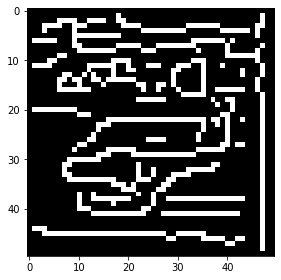

In [68]:
io.imshow(end)

In [74]:
flat=[1 if i else 0 for i in end.flatten()]
flat

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,


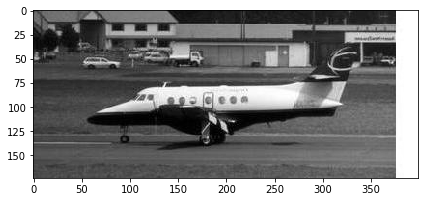

In [80]:
io.imshow(grayscale)

 We expect all external sources sited, and significant indication of EDA. 

<h4> Graphs </h4>

<h4> Sources </h4>

<h4> DataFrame Creation </h4>

In [81]:
def feature_frame(df):
    #ref=df.copy(deep=True)
    #ref['red']=df['Pictures'].apply(color_matrix)
    grey=[]
    for image in df['Pictures']:
        grey.append(rgb2gray(image))
    
    df=pd.DataFrame({
        'size': df['Pictures'].apply(ft0),
        'red_avg': df['Pictures'].apply(ft1),
        'aspectratio': df['Pictures'].apply(ft2),
        'green_avg': df['Pictures'].apply(ft3),
        'blue_avg': df['Pictures'].apply(ft4),
        'red_std': df['Pictures'].apply(ft5),
        'green_std': df['Pictures'].apply(ft6),
        'blue_std': df['Pictures'].apply(ft7),
        'grey_std': grey.apply(ft8),
        'colorful': df['Pictures'].apply(ft9),
        'num_blob': df['Pictures'].apply(ft10),
        'red_rank': df['Pictures'].apply(ft11),
        'green_rank': df['Pictures'].apply(ft113),
        'blue_rank': df['Pictures'].apply(ft14),
        'encoding': df['Encoding']
    })
    return df
    #Returns data-frame with all the features now inside, and calculated


In [82]:
data_from_nb1=pd.read_pickle("starting_data.pkl")
feature_frame(data_from_nb1)

NameError: name 'data_from_nb1' is not defined

In [ ]:
feature_frame.to_pickle('transformed_data.pkl')